# Computer Vision 2022 1st Lab - Part 2: Interest Point Detection<br>

Ηλιόπουλος Γεώργιος: 03118815 <br>
Σερλής Αναστάσιος Εμανουήλ - 03118125

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

C:\Users\Manos Anastassis\anaconda3\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Manos Anastassis\anaconda3\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Manos Anastassis\anaconda3\envs\cv_lab1_env\lib\s

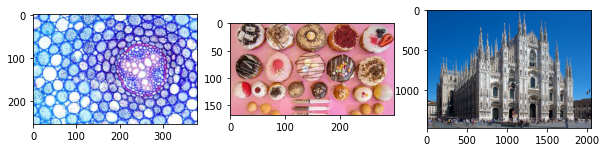

In [6]:
sigma=2
r=2.5
k=0.05
theta_korn=0.005
s=1.5
N=4

# read and plot images
img_cells = cv2.imread('cells.jpg')
img_donuts = cv2.imread('donuts.jpg')
img_test = cv2.imread('duomo_edges.jpg')

img_cells = cv2.cvtColor(img_cells, cv2.COLOR_BGR2RGB)
img_donuts = cv2.cvtColor(img_donuts, cv2.COLOR_BGR2RGB)
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)


fig, ax = plt.subplots(1, 3, figsize = (10,40))
ax[0].imshow(img_cells)
ax[1].imshow(img_donuts)
ax[2].imshow(img_test)


img_cells_gray = cv2.cvtColor(img_cells, cv2.COLOR_RGB2GRAY)
img_cells_gray = img_cells_gray.astype(np.float)/255
img_donuts_gray = cv2.cvtColor(img_donuts, cv2.COLOR_RGB2GRAY)
img_donuts_gray = img_donuts_gray.astype(np.float)/255
img_test_gray = cv2.cvtColor(img_test, cv2.COLOR_RGB2GRAY)
img_test_gray = img_test_gray.astype(np.float)/255

In [7]:
import sys
from matplotlib.patches import Circle

def disk_strel(n):
    '''
        Return a structural element, which is a disk of radius n.
    '''
    r = int(np.round(n))
    d = 2*r+1
    x = np.arange(d) - r
    y = np.arange(d) - r
    x, y = np.meshgrid(x,y)
    strel = x**2 + y**2 <= r**2
    return strel.astype(np.uint8)

def interest_points_visualization(I_, kp_data_, ax=None):
    '''
    Plot keypoints chosen by detectos on image.
    Args:
        I_: Image (if colored, make sure it is in RGB and not BGR).
        kp_data_: Nx3 array, as described in assignment.
        ax: Matplotlib axis to plot on (if None, a new Axes object is created).
    Returns:
        ax: Matplotlib axis where the image was plotted.
    '''
    try:
        I = np.array(I_)
        kp_data = np.array(kp_data_)
    except:
        print('Conversion to numpy arrays failed, check if the inputs (image and keypoints) are in the required format.')
        exit(2)

    try:
        assert(len(I.shape) == 2 or (len(I.shape) == 3 and I.shape[2] == 3))
    except AssertionError as e:
        print('interest_points_visualization: Image must be either a 2D matrix or a 3D matrix with the last dimension having size equal to 3.', file=sys.stderr)
        exit(2)

    try:
        assert(len(kp_data.shape) == 2 and kp_data.shape[1] == 3)
    except AssertionError as e:
        print('interest_points_visualization: kp_data must be a 2D matrix with 3 columns.', file=sys.stderr)
        exit(2)

    if ax is None:
        _, ax = plt.subplots()

    ax.set_aspect('equal')
    ax.imshow(I)
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

    for i in range(len(kp_data)):
        x, y, sigma = kp_data[i]
        circ = Circle((x, y), 3*sigma, edgecolor='r', fill=False, linewidth=1)
        ax.add_patch(circ)

    return ax

kern = np.array([ #kern is B
    [0,1,0],
    [1,1,1],
    [0,1,0]
], dtype=np.uint8)





C:\Users\grgsl\anaconda3\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


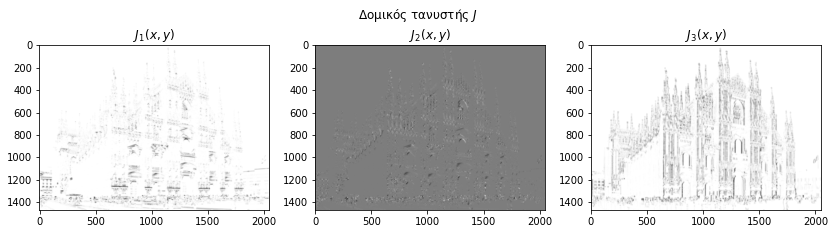

In [4]:
#plotting J

img = img_test
sigma = 2
r = 2.5
k = 0.05
theta_corn = 0.005

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = img_gray.astype(np.float)/255
    
n = int(2 * np.ceil(3 * sigma) + 1)
gauss1D_s = cv2.getGaussianKernel(n, sigma) # Column vector
gauss2D_s = gauss1D_s @ gauss1D_s.T # Symmetric gaussian kernel
img_smooth = cv2.filter2D(img_gray, -1, gauss2D_s)

Is_x,Is_y=np.gradient(img_smooth)

n=int(2*np.ceil(3*r)+1) 
gauss1D_r = cv2.getGaussianKernel(n, r) # Column vector
gauss2D_r = gauss1D_r @ gauss1D_r.T # Symmetric gaussian kernel

J1= cv2.filter2D(Is_x*Is_x, -1, gauss2D_r) 
J2= cv2.filter2D(Is_x*Is_y, -1, gauss2D_r)
J3= cv2.filter2D(Is_y*Is_y, -1, gauss2D_r)

plt.figure(figsize=(14,3.5))
plt.subplot(1, 3, 1)
plt.imshow(J1, cmap='gray_r')
plt.title("$J$$_1$$(x,y)$")

plt.subplot(1, 3, 2)
plt.imshow(J2, cmap='gray_r')
plt.title("$J$$_2$$(x,y)$")

plt.subplot(1, 3, 3)
plt.imshow(J3, cmap='gray_r')
plt.title("$J$$_3$$(x,y)$")

plt.suptitle('Δομικός τανυστής $J$')
plt.show()

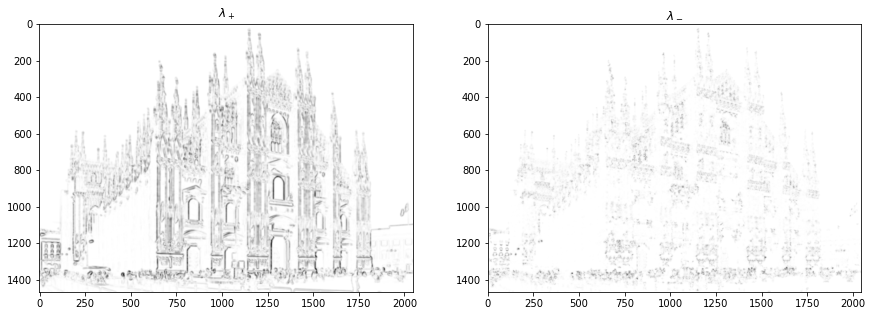

In [5]:
#plotting eigenvalues λ-, λ+

lambda_plus=0.5*(J1+J3+np.sqrt((J1-J3)**2+4*(J2**2)))
lambda_minus=0.5*(J1+J3-np.sqrt((J1-J3)**2+4*(J2**2)))

plt.figure(figsize=(14.73,5.59))
plt.subplot(1, 2, 1)
plt.imshow(lambda_plus, cmap='gray_r')
plt.title("$λ$$_+$")

plt.subplot(1, 2, 2)
plt.imshow(lambda_minus, cmap='gray_r')
plt.title("$λ$$_-$")

plt.show()

In [8]:
def corner_detect(img,sigma,r,k,theta_corn):
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = img_gray.astype(np.float)/255
    
    n = int(2 * np.ceil(3 * sigma) + 1)
    gauss1D_s = cv2.getGaussianKernel(n, sigma) # Column vector
    gauss2D_s = gauss1D_s @ gauss1D_s.T # Symmetric gaussian kernel
    img_smooth = cv2.filter2D(img_gray, -1, gauss2D_s)

    Is_x,Is_y=np.gradient(img_smooth)

    n=int(2*np.ceil(3*r)+1) 
    gauss1D_r = cv2.getGaussianKernel(n, r) # Column vector
    gauss2D_r = gauss1D_r @ gauss1D_r.T # Symmetric gaussian kernel

    J1= cv2.filter2D(Is_x*Is_x, -1, gauss2D_r) 
    J2= cv2.filter2D(Is_x*Is_y, -1, gauss2D_r)
    J3= cv2.filter2D(Is_y*Is_y, -1, gauss2D_r)

    #2.1.2
    lambda_plus=0.5*(J1+J3+np.sqrt((J1-J3)**2+4*(J2**2)))
    lambda_minus=0.5*(J1+J3-np.sqrt((J1-J3)**2+4*(J2**2)))
    R=lambda_plus*lambda_minus-k*((lambda_plus+lambda_minus)**2)


    #2.1.3
    R=lambda_plus*lambda_minus-k*((lambda_plus+lambda_minus)**2)

    ns = np.ceil(3*sigma)*2+1
    B_sq = disk_strel(ns)
    Cond1 = (R==cv2.dilate(R,B_sq))

    th=theta_corn*np.max(R)
    Cond2 = (R > th)
    final = Cond1 & Cond2

    kp_data=[]
    vertical_len, horizontal_len = np.shape(final)
    for i in range(vertical_len):
        for j in range(horizontal_len):
            if(final[i][j]):
                kp_data.append([j, i, sigma])

    interest_points_visualization(img,kp_data)
    
    #ip_1=np.transpose(np.nonzero(final==True))

    
        

    #for i in range((np.shape(ip_1)[0])):
     #   ip_1[i][0] , ip_1[i][1] = ip_1[i][1], ip_1[i][0]
    #if(np.shape(ip_1)[0]==0):  ip_1=np.zeros([1,2],dtype=int)
    #s_array=[[sigma]]*np.shape(ip_1)[0]
    #ip_2=np.append(ip_1, s_array, axis=1)
    #interest_points_visualization(img_cells,ip_2)

C:\Users\Manos Anastassis\anaconda3\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


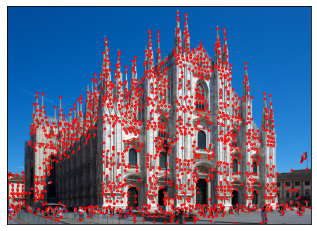

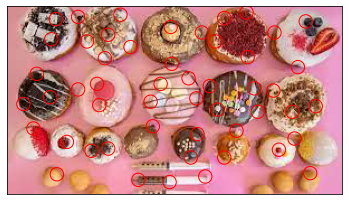

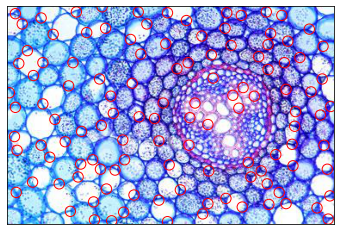

In [11]:
sigma = 2
r = 2.5
k = 0.05
t = 0.005
corner_detect(img_test,sigma,r,k,t)
corner_detect(img_donuts,sigma,r,k,t)
corner_detect(img_cells,sigma,r,k,t)

In [27]:
def multi_corner_detect(img,sigma,r,k,theta_corn,s,N):
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = img_gray.astype(np.float)/255
    
    sigmas=np.zeros(N)
    rs=np.zeros(N)
    stupid=[[0]]
    LoG=[]
    for i in range(N):
        sigmas[i]=(s**i)*sigma
        rs[i]=(r**i)*r


    R=[]
    for i in range(N):
        m = int(2*np.ceil(3*rs[i])+1)
        n = int(2 * np.ceil(3 * sigmas[i]) + 1)
        gauss1D_s = cv2.getGaussianKernel(n, sigmas[i]) # Column vector
        gauss2D_s = gauss1D_s @ gauss1D_s.T # Symmetric gaussian kernel
        gauss1D_r = cv2.getGaussianKernel(m, rs[i]) # Column vector  
        gauss2D_r = gauss1D_r @ gauss1D_r.T # Symmetric gaussian kernel
        img_smooth = cv2.filter2D(img_gray, -1, gauss2D_s)
    
    
    
        Lx,Ly=np.gradient(img_smooth)
        Lxx,Lxy=np.gradient(Lx)
        Lyx,Lyy=np.gradient(Ly)
        LoG.append(np.array((((sigmas[i])**2)*abs(Lxx+Lyy))))
    
        Is_x,Is_y=np.gradient(img_smooth)
    
        J1=(cv2.filter2D(Is_x*Is_x, -1, gauss2D_r)) 
        J2=(cv2.filter2D(Is_x*Is_y, -1, gauss2D_r)) 
        J3=(cv2.filter2D(Is_y*Is_y, -1, gauss2D_r)) 
    
    
        lambda_plus=(0.5*(J1+J3+np.sqrt((J1-J3)**2+4*(J2**2))))
        lambda_minus=(0.5*(J1+J3-np.sqrt((J1-J3)**2+4*(J2**2))))
        R.append(np.array(lambda_plus*lambda_minus-k*((lambda_plus+lambda_minus)**2)))


                 
    finals=[]
    for i in range(N):
        ns = np.ceil(3*sigmas[i])*2+1
        B_sq = disk_strel(ns)
        Cond1 = ( R[i]==cv2.dilate(R[i],B_sq))
        th=theta_corn*np.max(R[i])
        Cond2 = (R[i] > th)
        if i==0: 
            Cond3 = (LoG[i]>LoG[i+1])
        if i==N-1:
            Cond3 = (LoG[i]>LoG[i-1])
        else:
            Cond3 = ((LoG[i]>LoG[i-1]) & (LoG[i]>LoG[i+1]))
        temp_boolean = Cond1 & Cond2 & Cond3
        finals.append(temp_boolean)
    
 
    
    kp_data=[]
     
    for i in range(N):  
        vertical_len, horizontal_len=np.shape(finals[i])
        for j in range(vertical_len):
            for k in range(horizontal_len):
                if(finals[i][j][k]):
                    kp_data.append([k, j, sigmas[i]])


    interest_points_visualization(img,kp_data)
    plt.title("N = %1.f , σ = %2.f"%(N,sigma))

C:\Users\Manos Anastassis\anaconda3\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


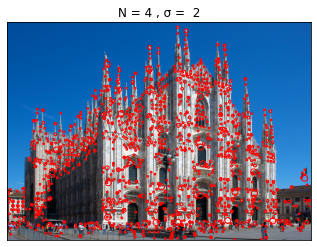

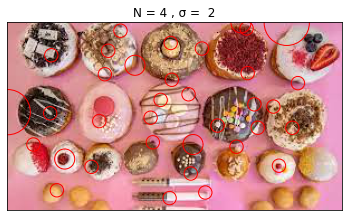

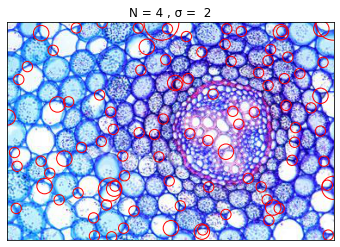

In [28]:
sigma = 2
r = 2.5
k = 0.05
t = 0.005
s=1.5
N=4
multi_corner_detect(img_test,sigma,r,k,t,s,N)
multi_corner_detect(img_donuts,sigma,r,k,t,s,N)
multi_corner_detect(img_cells,sigma,r,k,t,s,N)

In [24]:
def blob_detect(img,sigma,r,k,theta_corn):

    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = img_gray.astype(np.float)/255
    
    n = int(2 * np.ceil(3 * sigma) + 1)
    gauss1D_s = cv2.getGaussianKernel(n, sigma) # Column vector
    gauss2D_s = gauss1D_s @ gauss1D_s.T # Symmetric gaussian kernel
    img_smooth = cv2.filter2D(img_gray, -1, gauss2D_s)
 
    Lx,Ly=np.gradient(img_smooth) #Ls
    Lxx,Lxy=np.gradient(Lx)
    Lyx,Lyy=np.gradient(Ly)

    R=Lxx*Lyy-(Lxy*Lxy) #det


    #2.3.2
    ns = np.ceil(3*sigma)*2+1 #arxika cond1+cond2
    B_sq = disk_strel(ns)
    Cond1 = (R==cv2.dilate(R,B_sq))

    th=theta_corn*np.max(R)
    Cond2 = (R >= th)
    final = Cond1 & Cond2

    kp_data=[]
    vertical_len, horizontal_len = np.shape(final)
    for i in range(vertical_len):
        for j in range(horizontal_len):
            if(final[i][j]):
                kp_data.append([j, i, sigma])

    interest_points_visualization(img,kp_data)
    
    plt.title("σ = %1.f"%sigma)


C:\Users\Manos Anastassis\anaconda3\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


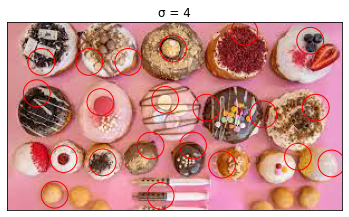

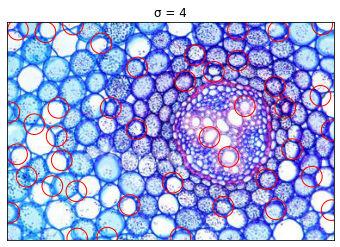

In [26]:
sigma = 4
r = 2.5
k = 0.05
t = 0.005
blob_detect(img_donuts,sigma,r,k,t)
blob_detect(img_cells,sigma,r,k,t)

In [34]:
#2.4

def multi_blob_detect(img,sigma,r,k,theta_corn,s,N):
     
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = img_gray.astype(np.float)/255
    
    sigmas=np.zeros(N)
    rs=np.zeros(N)
    stupid=[[0]]
    LoG=[]
    for i in range(N):
        sigmas[i]=(s**i)*sigma
        rs[i]=(r**i)*r


    R=[]
    for i in range(N):
        n = int(2 * np.ceil(3 * sigmas[i]) + 1)
        gauss1D_s = cv2.getGaussianKernel(n, sigmas[i]) # Column vector
        gauss2D_s = gauss1D_s @ gauss1D_s.T # Symmetric gaussian kernel
        img_smooth = cv2.filter2D(img_gray, -1, gauss2D_s)
        Lx,Ly=np.gradient(img_smooth)
        Lxx,Lxy=np.gradient(Lx)
        Lyx,Lyy=np.gradient(Ly)
        LoG.append(np.array((((sigmas[i])**2)*abs(Lxx+Lyy))))
        R.append(np.array(Lxx*Lyy-Lxy*Lyx))


    finals=[]
    for i in range(N):
        ns = np.ceil(3*sigmas[i])*2+1
        B_sq = disk_strel(ns)
        Cond1 = ( R[i]==cv2.dilate(R[i],B_sq))
        th=theta_corn*np.max(R[i])
        Cond2 = (R[i] > th)
        if i==0: 
            Cond3 = (LoG[i]>LoG[i+1])
        if i==N-1:
            Cond3 = (LoG[i]>LoG[i-1])
        else:
            Cond3 = ((LoG[i]>LoG[i-1]) & (LoG[i]>LoG[i+1]))
            temp_boolean = Cond1 & Cond2 & Cond3
        finals.append(temp_boolean)
    
    



    kp_data=[]
     
    for i in range(N):  
        vertical_len, horizontal_len=np.shape(finals[i])
        for j in range(vertical_len):
            for k in range(horizontal_len):
                if(finals[i][j][k]):
                    kp_data.append([k, j, sigmas[i]])


    interest_points_visualization(img,kp_data)
    plt.title("N = %1.f , σ = %2.f"%(N,sigma))
    

C:\Users\Manos Anastassis\anaconda3\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


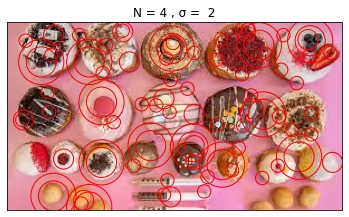

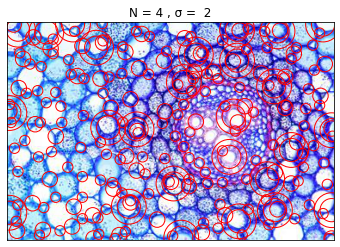

In [36]:
sigma = 2
r = 2.5
k = 0.05
t = 0.005
s=1.5
N=4
multi_blob_detect(img_donuts,sigma,r,k,t,s,N)
multi_blob_detect(img_cells,sigma,r,k,t,s,N)

In [37]:
def box_filters(img,sigma,r,k,theta_corn):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = img_gray.astype(np.float)/255
    
    n = int (2*np.ceil(3*sigma)+1)
        
    gaussian = cv2.getGaussianKernel(n,sigma) 
    gauss2D = gaussian @ gaussian.T
    I = cv2.filter2D(img_gray, -1, gauss2D)
    
    olokl_x=np.cumsum(img_gray,axis=0)
    olokl_y=np.cumsum(img_gray,axis=1)
    olokl=np.cumsum(olokl_x,axis=1)

    n = int(2 * np.ceil(3 * sigma) + 1)
    n1=int(4*np.floor(n/6)+1) 
    n2=int(2*np.floor(n/6)+1)  
    n3=int((n-n1)/2)
    n4=int((n-n2)/2)
    n5=int((n-1)/2)  
    n6=int((n-2*n2)/3)
    n7=int((n1-1)/2)
    n8=int((n2-1)/2)
    n9=int((n6-1)/2)
    
    thres0=5*int(n5)
    thres=0
    
    Lxx = np.array([[0 for j in range(np.shape(olokl)[1])] for i in range(np.shape(olokl)[0])])
    Lyy = np.array([[0 for j in range(np.shape(olokl)[1])] for i in range(np.shape(olokl)[0])])
    Lxy = np.array([[0 for j in range(np.shape(olokl)[1])] for i in range(np.shape(olokl)[0])])
    
    olokl_ext=np.array([[0 for j in range(np.shape(olokl)[1]+thres0)] for i in range(np.shape(olokl)[0]+thres0)])

    for i, row in enumerate(olokl):
        for j, col in enumerate(row):
            if( (i>=n5) and (i<np.shape(olokl)[0]+n5) and (j>=n5) and (j<np.shape(olokl)[1] +n5)):
                olokl_ext[i][j]=olokl[i][j]
                
    olokl_ext_x=np.array([[0 for j in range(np.shape(olokl)[1]+thres0)] for i in range(np.shape(olokl)[0]+thres0)])

    for i, row in enumerate(olokl):
        for j, col in enumerate(row):
            if( (i>=n5) and (i<np.shape(olokl)[0]+n5) and (j>=n5) and (j<np.shape(olokl)[1] +n5 )):
                   olokl_ext_x[i][j]=olokl_x[i][j]
                
    olokl_ext_y=np.array([[0 for j in range(np.shape(olokl)[1]+thres0)] for i in range(np.shape(olokl)[0]+thres0)])

    for i, row in enumerate(olokl):
        for j, col in enumerate(row):
            if( (i>=n5) and (i<np.shape(olokl)[0]+n5) and (j>=n5) and (j<np.shape(olokl)[1]+n5 )):
                   olokl_ext_y[i][j]=olokl_y[i][j]
                    
    for i, row1 in enumerate(olokl_ext_x):
        for j, col1 in enumerate(row1):
            if ( (i>=n5) and (i<n5+np.shape(olokl)[0]-thres) and (j>=n5) and (j<n5+np.shape(olokl)[1]-thres)): 
                LA2=(-2)*olokl_ext[i-n7][j-n8]
                LC2=(-2)*olokl_ext[i+n7][j+n8]
                LB2=(-2)*olokl_ext[i-n7][j+n8]
                LD2=(-2)*olokl_ext[i+n7][j-n8]
                LX2=LA2+LC2-LB2-LD2
                LA1=olokl_ext[i-n7][j-n8-(2*n8+1)]
                LC1=olokl_ext[i+n7][j+n8-(2*n8+1)]
                LB1=olokl_ext[i-n7][j+n8-(2*n8+1)]
                LD1=olokl_ext[i+n7][j-n8-(2*n8+1)]
                LX1=LA1+LC1-LB1-LD1
                LA3=olokl_ext[i-n7][j-n8+(2*n8+1)]
                LD3=olokl_ext[i+n7][j-n8+(2*n8+1)]
                LC3=olokl_ext[i+n7][j+n8+(2*n8+1)]
                LB3=olokl_ext[i-n7][j+n8+(2*n8+1)]
                LX3=LA3+LC3-LB3-LD3
                Lxx[i-n5][j-n5]=LX1+LX2+LX3
            #if(Lxx[i-n5][j-n5]>100):Lxx[i-n5][j-n5]=100
            #if(Lxx[i-n5][j-n5]<-200):Lxx[i-n5][j-n5]=-200

            
    for i, row1 in enumerate(olokl_ext_y):
        for j, col1 in enumerate(row1):
            if ( (i>=n5) and (i<n5+np.shape(olokl)[0]-thres) and (j>=n5) and (j<n5+np.shape(olokl)[1]-thres)): 
                LA2=(-2)*olokl_ext[i-n8][j-n7]
                LC2=(-2)*olokl_ext[i+n8][j+n7]
                LB2=(-2)*olokl_ext[i-n8][j+n7]
                LD2=(-2)*olokl_ext[i+n8][j-n7]
                LY2=LA2+LC2-LB2-LD2
                LA1=olokl_ext[i-n8-(2*n8+1)][j-n7]
                LC1=olokl_ext[i+n8-(2*n8+1)][j+n7]
                LB1=olokl_ext[i-n8-(2*n8+1)][j+n7]
                LD1=olokl_ext[i+n8-(2*n8+1)][j-n7]
                LY1=LA1+LC1-LB1-LD1
                LA3=olokl_ext[i-n8+(2*n8+1)][j-n7]
                LB3=olokl_ext[i-n8+(2*n8+1)][j+n7]
                LD3=olokl_ext[i+n8+(2*n8+1)][j-n7]
                LC3=olokl_ext[i+n8+(2*n8+1)][j+n7]
                LY3=LA3+LC3-LB3-LD3
                Lyy[i-n5][j-n5]=LY1+LY2+LY3   
            #if(Lyy[i-n5][j-n5]>100):Lyy[i-n5][j-n5]=100
            #if(Lyy[i-n5][j-n5]<-200):Lyy[i-n5][j-n5]=-200


    if(n9==0):n9=1
    

    for i, row1 in enumerate(olokl_ext):
        for j, col1 in enumerate(row1):
            if ( (i>=n5) and (i<n5+np.shape(olokl)[0]-thres) and (j>=n5) and (j<n5+np.shape(olokl)[1]-thres)): 
                LA1=olokl_ext[i-(n9+n8)-n8][j-(n9+n8)-n8]
                LB1=olokl_ext[i-(n9+n8)-n8][j-(n9+n8)+n8]
                LC1=olokl_ext[i-(n9+n8)+n8][j-(n9+n8)+n8]
                LD1=olokl_ext[i-(n9+n8)+n8][j-(n9+n8)-n8]
                L1=LA1+LC1-LD1-LB1
            
                LA2=(-1)*olokl_ext[i-(n9+n8)-n8][j+(n9+n8)-n8]
                LB2=(-1)*olokl_ext[i-(n9+n8)-n8][j+(n9+n8)+n8]
                LC2=(-1)*olokl_ext[i-(n9+n8)+n8][j+(n9+n8)+n8]
                LD2=(-1)*olokl_ext[i-(n9+n8)+n8][j+(n9+n8)-n8]
                L2=LA2+LC2-LD2-LB2
            
                LA3=(-1)*olokl_ext[i+(n9+n8)-n8][j-(n9+n8)-n8]
                LB3=(-1)*olokl_ext[i+(n9+n8)-n8][j-(n9+n8)+n8]
                LC3=(-1)*olokl_ext[i+(n9+n8)+n8][j-(n9+n8)+n8]
                LD3=(-1)*olokl_ext[i+(n9+n8)+n8][j-(n9+n8)-n8]
                L3=LA3+LC3-LD3-LB3
            
                LA4=olokl_ext[i+(n9+n8)-n8][j+(n9+n8)-n8]
                LB4=olokl_ext[i+(n9+n8)-n8][j+(n9+n8)+n8]
                LC4=olokl_ext[i+(n9+n8)+n8][j+(n9+n8)+n8]
                LD4=olokl_ext[i+(n9+n8)+n8][j+(n9+n8)-n8]
                L4=LA4+LC4-LD4-LB4
            
                Lxy[i-n5][j-n5]=L1+L2+L3+L4
            #if(Lxy[i-n5][j-n5]>100):Lxy[i-n5][j-n5]=100
            #if(Lxy[i-n5][j-n5]<-200):Lxy[i-n5][j-n5]=-200
            
    R=Lxx*Lyy-(0.9*Lxy)**2
    R = (R - R.min())/R.max() # turn to binary
    ns = np.ceil(3*sigma)*2+1 #arxika cond1+cond2
    B_sq = disk_strel(ns)
    Cond1 = (R==cv2.dilate(R,B_sq))
    

    th=theta_corn*np.max(R) 
    Cond2 = (R > th)
    final = Cond1 & Cond2


    kp_data=[]
    vertical_len, horizontal_len = np.shape(final)
    for i in range(vertical_len):
        for j in range(horizontal_len):
            if(final[i][j]):
                kp_data.append([j, i, sigma])

    interest_points_visualization(img,kp_data)
    
    plt.title("σ = %1.f"%sigma)
    
    

C:\Users\Manos Anastassis\anaconda3\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
interest_points_visualization: kp_data must be a 2D matrix with 3 columns.
interest_points_visualization: kp_data must be a 2D matrix with 3 columns.


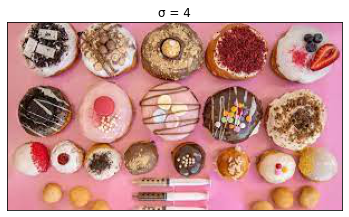

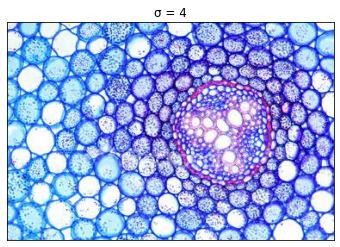

In [41]:
sigma = 4
r = 2.5
k = 0.05
t = 0.005
box_filters(img_donuts,sigma,r,k,t)
box_filters(img_cells,sigma,r,k,t)

In [45]:
def multi_box_filter(img,sigma,r,k,theta_corn,s,N):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = img_gray.astype(np.float)/255
    
    olokl_x=np.cumsum(img_gray,axis=0)
    olokl_y=np.cumsum(img_gray,axis=1)
    olokl=np.cumsum(olokl_x,axis=1)
    
    sigmas=np.zeros(N)
    rs=np.zeros(N)
    stupid=[[0]]
    LoG=[]
    for i in range(N):
        sigmas[i]=(s**i)*sigma
        rs[i]=(r**i)*r


    R=[]
    for k in range(N):
        n = int(2 * np.ceil(3 * sigmas[k]) + 1)
        n1=int(4*np.floor(n/6)+1)
        n2=int(2*np.floor(n/6)+1)
        n3=int((n-n1)/2)
        n4=int((n-n2)/2)
        n5=int((n-1)/2)
        n6=int((n-2*n2)/3)
        n7=int((n1-1)/2)
        n8=int((n2-1)/2)
        n9=int((n6-1)/2)
        
        thres0=5*int(n5)
        thres=0
    
        Lxx = np.array([[0 for j in range(np.shape(olokl)[1])] for i in range(np.shape(olokl)[0])])
        Lyy = np.array([[0 for j in range(np.shape(olokl)[1])] for i in range(np.shape(olokl)[0])])
        Lxy = np.array([[0 for j in range(np.shape(olokl)[1])] for i in range(np.shape(olokl)[0])])
    
        olokl_ext=np.array([[0 for j in range(np.shape(olokl)[1]+thres0)] for i in range(np.shape(olokl)[0]+thres0)])

        for i, row in enumerate(olokl):
            for j, col in enumerate(row):
                if( (i>=n5) and (i<np.shape(olokl)[0]+n5) and (j>=n5) and (j<np.shape(olokl)[1] +n5)):
                    olokl_ext[i][j]=olokl[i][j]
                
        olokl_ext_x=np.array([[0 for j in range(np.shape(olokl)[1]+thres0)] for i in range(np.shape(olokl)[0]+thres0)])

        for i, row in enumerate(olokl):
            for j, col in enumerate(row):
                if( (i>=n5) and (i<np.shape(olokl)[0]+n5) and (j>=n5) and (j<np.shape(olokl)[1] +n5 )):
                       olokl_ext_x[i][j]=olokl_x[i][j]
                
        olokl_ext_y=np.array([[0 for j in range(np.shape(olokl)[1]+thres0)] for i in range(np.shape(olokl)[0]+thres0)])

        for i, row in enumerate(olokl):
            for j, col in enumerate(row):
                if( (i>=n5) and (i<np.shape(olokl)[0]+n5) and (j>=n5) and (j<np.shape(olokl)[1]+n5 )):
                       olokl_ext_y[i][j]=olokl_y[i][j]
                    
        for i, row1 in enumerate(olokl_ext_x):
            for j, col1 in enumerate(row1):
                if ( (i>=n5) and (i<n5+np.shape(olokl)[0]-thres) and (j>=n5) and (j<n5+np.shape(olokl)[1]-thres)): 
                    LA2=(-2)*olokl_ext[i-n7][j-n8]
                    LC2=(-2)*olokl_ext[i+n7][j+n8]
                    LB2=(-2)*olokl_ext[i-n7][j+n8]
                    LD2=(-2)*olokl_ext[i+n7][j-n8]
                    LX2=LA2+LC2-LB2-LD2
                    LA1=olokl_ext[i-n7][j-n8-(2*n8+1)]
                    LC1=olokl_ext[i+n7][j+n8-(2*n8+1)]
                    LB1=olokl_ext[i-n7][j+n8-(2*n8+1)]
                    LD1=olokl_ext[i+n7][j-n8-(2*n8+1)]
                    LX1=LA1+LC1-LB1-LD1
                    LA3=olokl_ext[i-n7][j-n8+(2*n8+1)]
                    LD3=olokl_ext[i+n7][j-n8+(2*n8+1)]
                    LC3=olokl_ext[i+n7][j+n8+(2*n8+1)]
                    LB3=olokl_ext[i-n7][j+n8+(2*n8+1)]
                    LX3=LA3+LC3-LB3-LD3
                    Lxx[i-n5][j-n5]=LX1+LX2+LX3
                    
        for i, row1 in enumerate(olokl_ext_y):
            for j, col1 in enumerate(row1):
                if ( (i>=n5) and (i<n5+np.shape(olokl)[0]-thres) and (j>=n5) and (j<n5+np.shape(olokl)[1]-thres)): 
                    LA2=(-2)*olokl_ext[i-n8][j-n7]
                    LC2=(-2)*olokl_ext[i+n8][j+n7]
                    LB2=(-2)*olokl_ext[i-n8][j+n7]
                    LD2=(-2)*olokl_ext[i+n8][j-n7]
                    LY2=LA2+LC2-LB2-LD2
                    LA1=olokl_ext[i-n8-(2*n8+1)][j-n7]
                    LC1=olokl_ext[i+n8-(2*n8+1)][j+n7]
                    LB1=olokl_ext[i-n8-(2*n8+1)][j+n7]
                    LD1=olokl_ext[i+n8-(2*n8+1)][j-n7]
                    LY1=LA1+LC1-LB1-LD1
                    LA3=olokl_ext[i-n8+(2*n8+1)][j-n7]
                    LB3=olokl_ext[i-n8+(2*n8+1)][j+n7]
                    LD3=olokl_ext[i+n8+(2*n8+1)][j-n7]
                    LC3=olokl_ext[i+n8+(2*n8+1)][j+n7]
                    LY3=LA3+LC3-LB3-LD3
                    Lyy[i-n5][j-n5]=LY1+LY2+LY3  
        
        if(n9==0):n9=1
    

        for i, row1 in enumerate(olokl_ext):
            for j, col1 in enumerate(row1):
                if ( (i>=n5) and (i<n5+np.shape(olokl)[0]-thres) and (j>=n5) and (j<n5+np.shape(olokl)[1]-thres)): 
                    LA1=olokl_ext[i-(n9+n8)-n8][j-(n9+n8)-n8]
                    LB1=olokl_ext[i-(n9+n8)-n8][j-(n9+n8)+n8]
                    LC1=olokl_ext[i-(n9+n8)+n8][j-(n9+n8)+n8]
                    LD1=olokl_ext[i-(n9+n8)+n8][j-(n9+n8)-n8]
                    L1=LA1+LC1-LD1-LB1
            
                    LA2=(-1)*olokl_ext[i-(n9+n8)-n8][j+(n9+n8)-n8]
                    LB2=(-1)*olokl_ext[i-(n9+n8)-n8][j+(n9+n8)+n8]
                    LC2=(-1)*olokl_ext[i-(n9+n8)+n8][j+(n9+n8)+n8]
                    LD2=(-1)*olokl_ext[i-(n9+n8)+n8][j+(n9+n8)-n8]
                    L2=LA2+LC2-LD2-LB2
            
                    LA3=(-1)*olokl_ext[i+(n9+n8)-n8][j-(n9+n8)-n8]
                    LB3=(-1)*olokl_ext[i+(n9+n8)-n8][j-(n9+n8)+n8]
                    LC3=(-1)*olokl_ext[i+(n9+n8)+n8][j-(n9+n8)+n8]
                    LD3=(-1)*olokl_ext[i+(n9+n8)+n8][j-(n9+n8)-n8]
                    L3=LA3+LC3-LD3-LB3
            
                    LA4=olokl_ext[i+(n9+n8)-n8][j+(n9+n8)-n8]
                    LB4=olokl_ext[i+(n9+n8)-n8][j+(n9+n8)+n8]
                    LC4=olokl_ext[i+(n9+n8)+n8][j+(n9+n8)+n8]
                    LD4=olokl_ext[i+(n9+n8)+n8][j+(n9+n8)-n8]
                    L4=LA4+LC4-LD4-LB4
            
                    Lxy[i-n5][j-n5]=L1+L2+L3+L4
        LoG.append(np.array((((sigmas[k])**2)*abs(Lxx+Lyy))))
        R.append(np.array(Lxx*Lyy-(0.9*Lxy)**2))
    
   
    finals=[]
    for i in range(N):
        R[i]= (R[i] - R[i].min())/R[i].max() # turn to binary
        ns = np.ceil(3*sigmas[i])*2+1
        B_sq = disk_strel(ns)
        Cond1 = ( R[i]==cv2.dilate(R[i],B_sq))
        th=theta_corn*np.max(R[i])
        Cond2 = (R[i] > th)
        if i==0: 
            Cond3 = (LoG[i]>LoG[i+1])
        if i==N-1:
            Cond3 = (LoG[i]>LoG[i-1])
        else:
            Cond3 = ((LoG[i]>LoG[i-1]) & (LoG[i]>LoG[i+1]))
            temp_boolean = Cond1 & Cond2 & Cond3
        finals.append(temp_boolean)



    kp_data=[]
     
    for i in range(N):  
        vertical_len, horizontal_len=np.shape(finals[i])
        for j in range(vertical_len):
            for k in range(horizontal_len):
                if(finals[i][j][k]):
                    kp_data.append([k, j, sigmas[i]])


    interest_points_visualization(img,kp_data)

    plt.title("N = %1.f , σ = %2.f"%(N,sigma))

         
    
        
        

C:\Users\Manos Anastassis\anaconda3\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


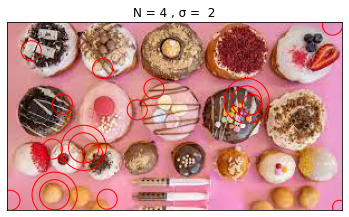

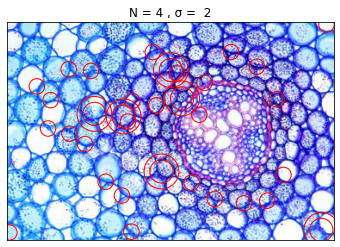

In [47]:
sigma = 2
r = 2.5
k = 0.05
t = 0.005
s=1.5
N=4
multi_box_filter(img_donuts,sigma,r,k,t,s,N)
multi_box_filter(img_cells,sigma,r,k,t,s,N)

In [43]:
def box_filters_2(img,sigma,r,k,theta_corn): 
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = img_gray.astype(np.float)/255
    
    n = int (2*np.ceil(3*sigma)+1)
        
    gaussian = cv2.getGaussianKernel(n,sigma) 
    gauss2D = gaussian @ gaussian.T
    I = cv2.filter2D(img_gray, -1, gauss2D)
    
    olokl = np.cumsum(np.cumsum(I,axis=1),axis=0) 

    
    d1 = (4 * np.floor(n/6) + 1).astype(int) 
    d2 = (2 * np.floor(n/6) + 1).astype(int) 
    x = max(d1//2,3*d2//2)
    paddedS_xx = np.pad(olokl, ((x, x), (x, x))) #np.pad(arr , ((up,down),(left,right)))
    paddedS_yy = np.pad(olokl, ((x, x), (x, x)))
    paddedS_xy = np.pad(olokl, ((x, x), (x, x))) 
    
    Exx = paddedS_xx - np.roll(paddedS_xx,-d1+1,axis=0) - np.roll(paddedS_xx,-d2+1,axis=1) + np.roll(paddedS_xx,(-d1+1,-d2+1),axis=(0,1))
    Lxx = Exx + np.roll(Exx,-2*d2,axis=0) - 2*np.roll(Exx,-d2,axis=0)

    Eyy = paddedS_yy - np.roll(paddedS_yy,-d1+1,axis=1) - np.roll(paddedS_yy,-d2+1,axis=0) + np.roll(paddedS_yy,(-d1+1,-d2+1),axis=(1,0))
    Lyy = Eyy + np.roll(Eyy,-2*d2,axis=1) - 2*np.roll(Eyy,-d2,axis=1)

    Exy = paddedS_xy - np.roll(paddedS_xy,-d2+1,axis=1) - np.roll(paddedS_xy,-d2+1,axis=0) + np.roll(paddedS_xy,(-d2+1,-d2+1),axis=(0,1))
    Lxy = Exy - np.roll(Exy,-d2-1,axis=1) - np.roll(Exy,-d2-1,axis=0) + np.roll(Exy,(-d2-1,-d2-1),axis=(0,1))
    

    
                                                                              
    R=Lxx*Lyy-(0.9*Lxy)**2
    R= (R - R.min())/R.max() # turn to binary 
    ns = np.ceil(3*sigma)*2+1 #arxika cond1+cond2
    B_sq = disk_strel(ns)
    Cond1 = (R==cv2.dilate(R,B_sq))

    th=theta_corn*np.max(R) 
    Cond2 = (R > th)
    final = Cond1 & Cond2

    kp_data=[]
    vertical_len, horizontal_len = np.shape(final)
    for i in range(vertical_len):
        for j in range(horizontal_len):
            if(final[i][j]):
                kp_data.append([j, i, sigma])

    interest_points_visualization(img,kp_data)
    
    plt.title("σ=%1.f" %sigma)
    
    
    
    
    

                                                                        
                                                                                
    
    
    
    
    

C:\Users\Manos Anastassis\anaconda3\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


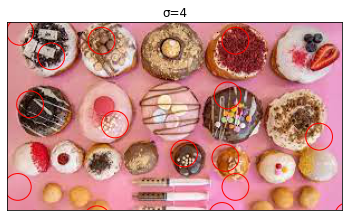

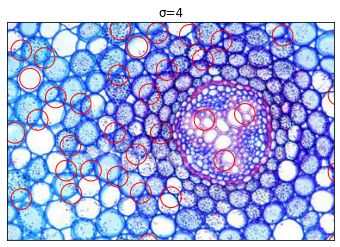

In [44]:
sigma = 4
r = 2.5
k = 0.05
t = 0.005
box_filters_2(img_donuts,sigma,r,k,t)
box_filters_2(img_cells,sigma,r,k,t)

In [48]:
def multi_box_filter_2(img,sigma,r,k,theta_corn,s,N):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = img_gray.astype(np.float)/255
    
    olokl_x=np.cumsum(img_gray,axis=0)
    olokl_y=np.cumsum(img_gray,axis=1)
    olokl=np.cumsum(olokl_x,axis=1)
    
    sigmas=np.zeros(N)
    rs=np.zeros(N)
    stupid=[[0]]
    LoG=[]
    for i in range(N):
        sigmas[i]=(s**i)*sigma
        rs[i]=(r**i)*r
        


    R=[]
    for k in range(N):
        
        n = int (2*np.ceil(3*sigmas[k])+1)
        d1 = (4 * np.floor(n/6) + 1).astype(int) 
        d2 = (2 * np.floor(n/6) + 1).astype(int) 
        x = max(d1//2,3*d2//2)
        
        Dxx_height = int ( 4*np.floor(n/6)+1 )
        Dxx_width  = int ( 2*np.floor(n/6)+1 )
    
        Dyy_height = int ( 2*np.floor(n/6)+1 )
        Dyy_width  = int ( 4*np.floor(n/6)+1 )
    
        Dxy_height = int ( 2*np.floor(n/6)+1 )
        Dxy_width  = int ( 2*np.floor(n/6)+1 )
        
        paddedS_xx = np.pad(olokl, ((x, x), (x, x))) #np.pad(arr , ((up,down),(left,right)))
        paddedS_yy = np.pad(olokl, ((x, x), (x, x)))
        paddedS_xy = np.pad(olokl, ((x, x), (x, x))) 
    
        Exx = paddedS_xx - np.roll(paddedS_xx,-d1+1,axis=0) - np.roll(paddedS_xx,-d2+1,axis=1) + np.roll(paddedS_xx,(-d1+1,-d2+1),axis=(0,1))
        Lxx = Exx + np.roll(Exx,-2*d2,axis=0) - 2*np.roll(Exx,-d2,axis=0)

        Eyy = paddedS_yy - np.roll(paddedS_yy,-d1+1,axis=1) - np.roll(paddedS_yy,-d2+1,axis=0) + np.roll(paddedS_yy,(-d1+1,-d2+1),axis=(1,0))
        Lyy = Eyy + np.roll(Eyy,-2*d2,axis=1) - 2*np.roll(Eyy,-d2,axis=1)

        Exy = paddedS_xy - np.roll(paddedS_xy,-d2+1,axis=1) - np.roll(paddedS_xy,-d2+1,axis=0) + np.roll(paddedS_xy,(-d2+1,-d2+1),axis=(0,1))
        Lxy = Exy - np.roll(Exy,-d2-1,axis=1) - np.roll(Exy,-d2-1,axis=0) + np.roll(Exy,(-d2-1,-d2-1),axis=(0,1))
        
        #Lxx = Lxx[:np.shape(Lxx)[0]-(d1+d2), :np.shape(Lxx)[1]-(d1+d2)]
        #Lyy = Lyy[:np.shape(Lyy)[0]-(d1+d2), :np.shape(Lyy)[1]-(d1+d2)]
        #Lxy = Lxx[:np.shape(Lxy)[0]-(d1+d2), :np.shape(Lxy)[1]-(d1+d2)]
        
        LoG.append(np.array((((sigmas[k])**2)*abs(Lxx+Lyy))))
        R.append(np.array(Lxx*Lyy-(0.9*Lxy)**2))
        
        
        n1=int(np.shape(LoG[k])[0]-(d1+d2))
        n2=int(np.shape(LoG[k])[1]-(d1+d2))

        LoG[k] = LoG[k][:n1, :n2]
        R[k] = R[k][:n1, :n2]

    
    finals=[]
    for i in range(N):
        R[i]= (R[i] - R[i].min())/R[i].max() # turn to binary
        ns = np.ceil(3*sigmas[i])*2+1
        B_sq = disk_strel(ns)
        Cond1 = ( R[i]==cv2.dilate(R[i],B_sq))
        th=theta_corn*np.max(R[i])
        Cond2 = (R[i] > th)
        if i==0: 
            Cond3 = (LoG[i]>LoG[i+1])
        if i==N-1:
            Cond3 = (LoG[i]>LoG[i-1])
        else:
            Cond3 = ((LoG[i]>LoG[i-1]) & (LoG[i]>LoG[i+1]))
            temp_boolean = Cond1 & Cond2 & Cond3
        finals.append(temp_boolean)

    kp_data=[]
     
    for i in range(N):  
        vertical_len, horizontal_len=np.shape(finals[i])
        for j in range(vertical_len):
            for k in range(horizontal_len):
                if(finals[i][j][k]):
                    kp_data.append([k, j, sigmas[i]])


    interest_points_visualization(img,kp_data)
    
    plt.title("N = %1.f , σ = %2.f"%(N,sigma))

C:\Users\Manos Anastassis\anaconda3\envs\cv_lab1_env\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


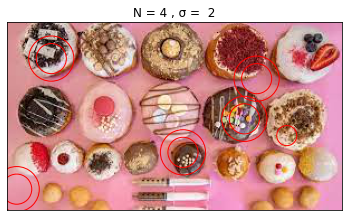

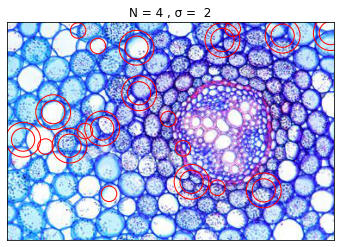

In [49]:
sigma = 2
r = 2.5
k = 0.05
t = 0.005
s=1.5
N=4
multi_box_filter_2(img_donuts,sigma,r,k,t,s,N)
multi_box_filter_2(img_cells,sigma,r,k,t,s,N)